In [1]:
import numpy as np
import pandas as pd
# for plotting:
import matplotlib.pyplot as plt
import seaborn as sns
# for analysis:
import scipy.stats as stats
# for plotting:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
#for specific acq and prep:
from acquire_zillow import *
from prepare_zillow import *
from explore_zillow import *

In [5]:
df = sns.load_dataset('tips')

In [6]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [7]:
# chi-squared test: smoker distribution between males and females
# df['logerror_abs'] = df.logerror.abs()
# df['logerror_abs_bin'] = pd.qcut(df.logerror_abs, 13, labels=False)

tbl = pd.crosstab(df['smoker'], df['sex'])
print(tbl)
stat, p, dof, expected = stats.chi2_contingency(tbl)
print('chi-squared statistic: {}'.format(stat))
print('p-statistic of logerror bins vs location clusters: {}'.format(p))

sex     Male  Female
smoker              
Yes       60      33
No        97      54
chi-squared statistic: 0.008763290531773594
p-statistic of logerror bins vs location clusters: 0.925417020494423


In [ ]:
# We can say from this comparison that we cannot reject the null hypothesis and say that there is no 
# distributive difference for smoking between men and women

In [9]:
#Let's look at a t-test to see if there is a difference between the mean tip of males vs females

In [10]:
tstat, pval = stats.ttest_ind(df[df.sex == 'Male'].tip, df[df.sex == 'Female'].tip)
print('Our t-statistic is {:.4} and the p-value is {:.4}'.format(tstat, pval))

Our t-statistic is 1.388 and the p-value is 0.1665


In [ ]:
#We have a p-value above 0.05 so we cannot say there is a statistical significance to the difference here.

In [12]:
tstat, pval = stats.ttest_ind(df[df.time == 'Dinner'].tip, df[df.time == 'Lunch'].tip)
print('Our t-statistic is {:.4} and the p-value is {:.4}'.format(tstat, pval))

Our t-statistic is 1.906 and the p-value is 0.0578


In [ ]:
# We can say here that there is probably a difference between tip values at dinner and lunch.  The t-statistic and p-value are both
# right outside of our typical thrsholds for significance (1.96 and 0.05 respecitvely)

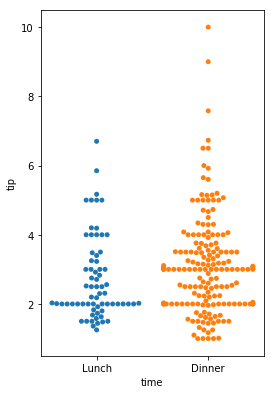

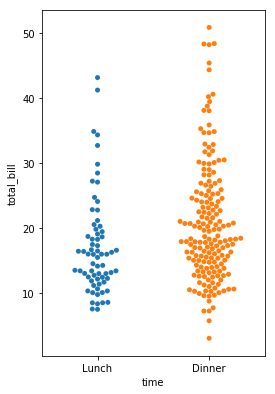

In [14]:
swarrrm(df, 'time', ['tip', 'total_bill'])

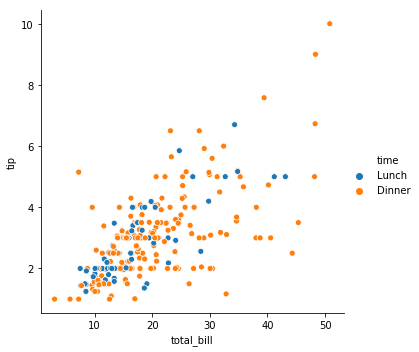

In [15]:
make_rel(df, 'total_bill', 'tip', 'time')